In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('data/output_file.csv')
df

,date,lang,iaShowId,station,showName,iaClipUrl,entities
0,2024-07-01T00:00:00Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,"[{'name': 'REPORTING', 'type': 'OTHER', 'numMe..."
1,2024-07-01T00:00:15Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,"[{'name': 'ROUND', 'type': 'EVENT', 'numMentio..."
2,2024-07-01T00:00:30Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,"[{'name': 'COUNTRY', 'type': 'LOCATION', 'numM..."
3,2024-07-01T00:00:45Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,"[{'name': 'SIZZA', 'type': 'PERSON', 'numMenti..."
4,2024-07-01T00:01:00Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,"[{'name': 'PARIS', 'type': 'LOCATION', 'mid': ..."
...,...,...,...,...,...,...,...
656787,2024-07-30T23:59:45Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,"[{'name': 'PEOPLE', 'type': 'PERSON', 'numMent..."
656788,2024-07-31T00:00:00Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,"[{'name': 'GRETCHEN WHITMER', 'type': 'PERSON'..."
656789,2024-07-31T00:00:15Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,"[{'name': 'ISSUES', 'type': 'OTHER', 'numMenti..."
656790,2024-07-31T00:00:30Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,"[{'name': ""DON'T"", 'type': 'PERSON', 'numMenti..."


In [4]:
df.shape

(656792, 7)

In [5]:
import ast

# Convert the 'entities' column from string to a list
df['entities'] = df['entities'].apply(ast.literal_eval)

In [6]:
df_exploded = df.explode('entities')

In [7]:
df_exploded.shape

(5050317, 7)

In [8]:
# Normalize the entities column
entities_df = pd.json_normalize(df_exploded['entities'])

# Drop the old entities column and join the new data
df_exploded = df_exploded.drop(columns=['entities']).join(entities_df)

In [9]:
df_exploded

,date,lang,iaShowId,station,showName,iaClipUrl,name,type,numMentions,avgSalience,mid,wikipediaUrl
0,2024-07-01T00:00:00Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,REPORTING,OTHER,1.0,0.003097,NaN,NaN
0,2024-07-01T00:00:00Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,REPORTING,OTHER,1.0,0.003097,NaN,NaN
0,2024-07-01T00:00:00Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,REPORTING,OTHER,1.0,0.003097,NaN,NaN
1,2024-07-01T00:00:15Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,NEWSDAY,ORGANIZATION,1.0,0.002209,/m/02zhhp,https://en.wikipedia.org/wiki/Newsday
1,2024-07-01T00:00:15Z,en,BBCNEWS_20240701_000000_Newsday,BBCNEWS,Newsday,https://archive.org/details/BBCNEWS_20240701_0...,NEWSDAY,ORGANIZATION,1.0,0.002209,/m/02zhhp,https://en.wikipedia.org/wiki/Newsday
...,...,...,...,...,...,...,...,...,...,...,...,...
656790,2024-07-31T00:00:30Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,BUTI,PERSON,2.0,0.000023,NaN,NaN
656790,2024-07-31T00:00:30Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,BUTI,PERSON,2.0,0.000023,NaN,NaN
656790,2024-07-31T00:00:30Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,BUTI,PERSON,2.0,0.000023,NaN,NaN
656791,2024-07-31T00:00:45Z,en,MSNBCW_20240730_230000_The_ReidOut,MSNBC,The ReidOut,https://archive.org/details/MSNBCW_20240730_23...,CHRISTMAS,EVENT,1.0,0.000014,/m/01vq3,https://en.wikipedia.org/wiki/Christmas


In [10]:
import matplotlib.pyplot as plt

## Entity Frequency Analysis

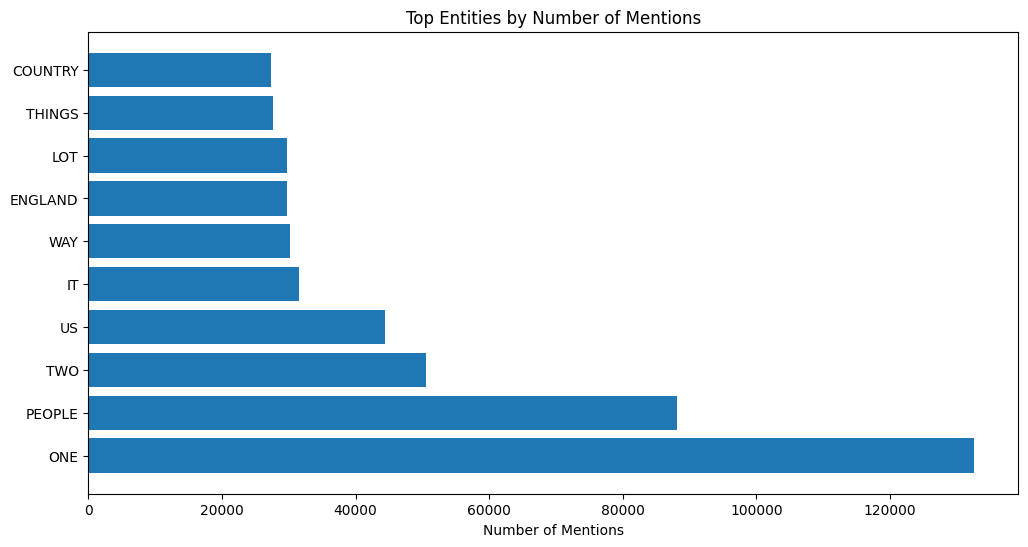

In [11]:
entity_stats = df_exploded.groupby('name').agg(
    num_mentions=('numMentions', 'sum'),
    avg_salience=('avgSalience', 'mean')
).reset_index()

# Filter top entities based on number of mentions
top_entities = entity_stats.nlargest(10, 'num_mentions')

# Plot number of mentions for top entities
plt.figure(figsize=(12, 6))
plt.barh(top_entities['name'], top_entities['num_mentions'])
plt.xlabel('Number of Mentions')
plt.title('Top Entities by Number of Mentions')
plt.show()

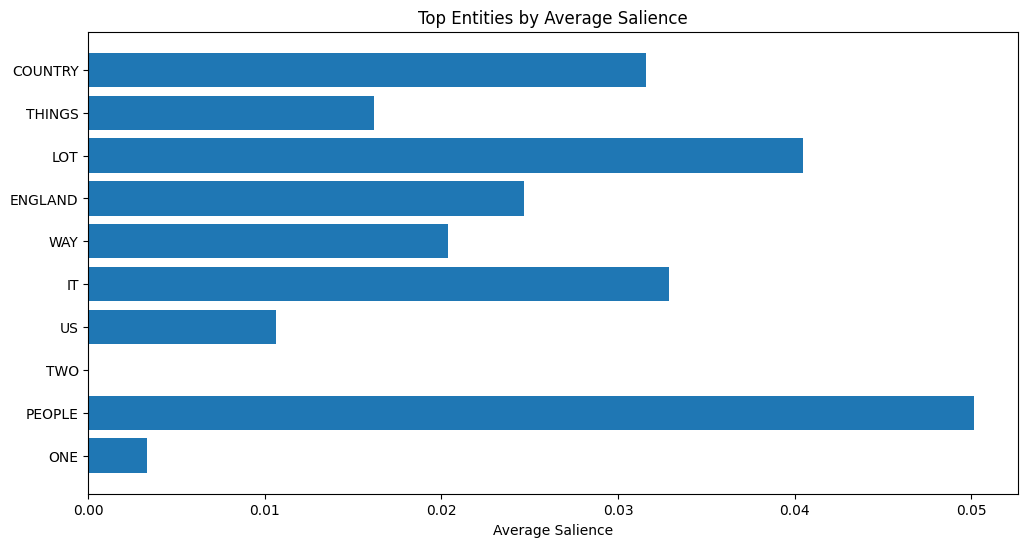

In [12]:
# Plot average salience for top entities
plt.figure(figsize=(12, 6))
plt.barh(top_entities['name'], top_entities['avg_salience'])
plt.xlabel('Average Salience')
plt.title('Top Entities by Average Salience')
plt.show()

##Temporal Trends

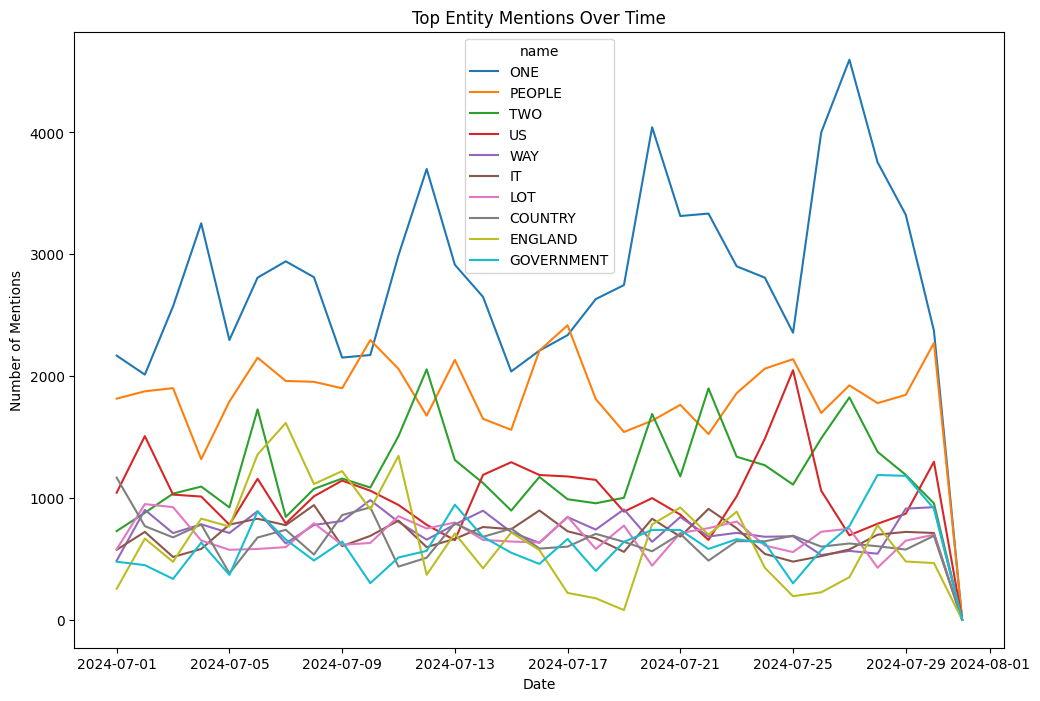

In [13]:

df_exploded['date'] = pd.to_datetime(df_exploded['date'], errors='coerce')
df_exploded['date'] = df_exploded['date'].dt.date
entity_trends = df_exploded.groupby(['date', 'name']).size().unstack(fill_value=0)

# Plot trends for top entities
top_entities = entity_trends.sum().nlargest(10).index
entity_trends[top_entities].plot(figsize=(12, 8))
plt.title('Top Entity Mentions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.show()

## Network and Show Comparison

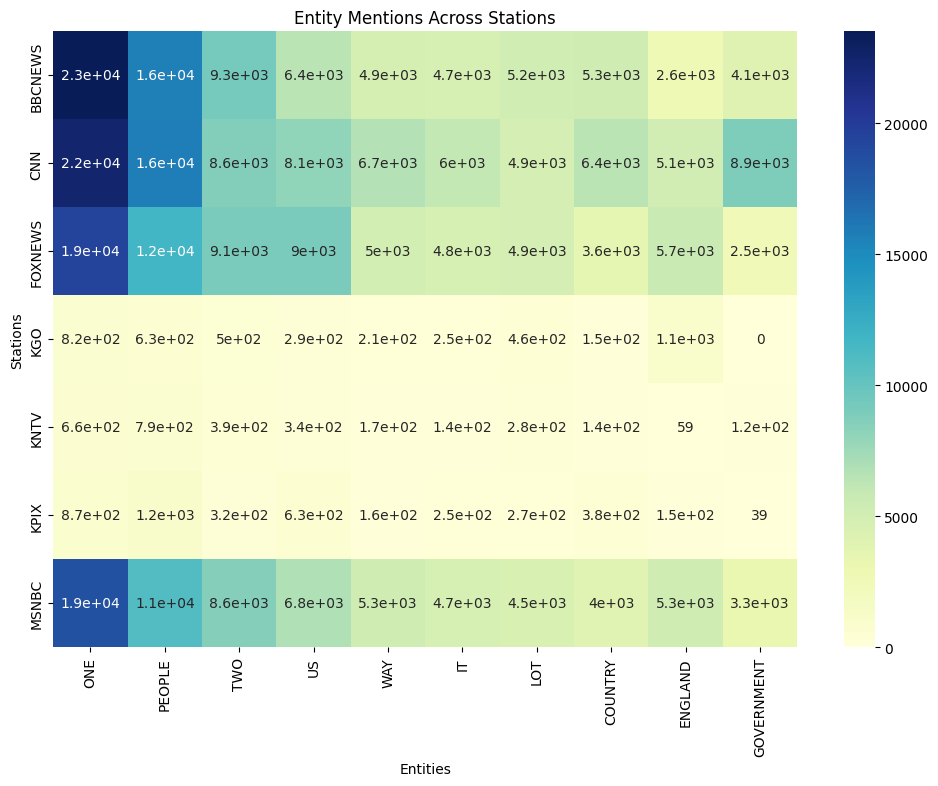

In [14]:
# Group by station and entity
import seaborn as sns
station_entities = df_exploded.groupby(['station', 'name']).size().unstack(fill_value=0)

# Filter top entities based on total mentions
top_entities = station_entities.sum().nlargest(10).index

# Plot heatmap for entity mentions across stations
plt.figure(figsize=(12, 8))
sns.heatmap(station_entities[top_entities], cmap='YlGnBu', annot=True)
plt.title('Entity Mentions Across Stations')
plt.xlabel('Entities')
plt.ylabel('Stations')
plt.show()

##Contextual Analysis Using Entity Types

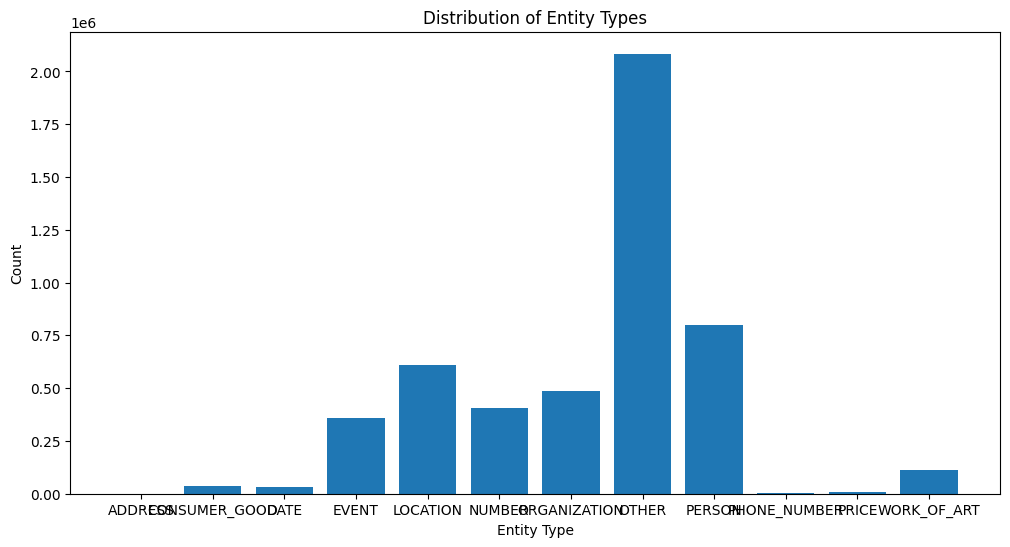

In [15]:
# Group by entity type and aggregate counts
entity_types = df_exploded.groupby('type').size().reset_index(name='count')

# Plot the distribution of entity types
plt.figure(figsize=(12, 6))
plt.bar(entity_types['type'], entity_types['count'])
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.title('Distribution of Entity Types')
plt.show()

##CO_OCCURENCE ANALYSIS

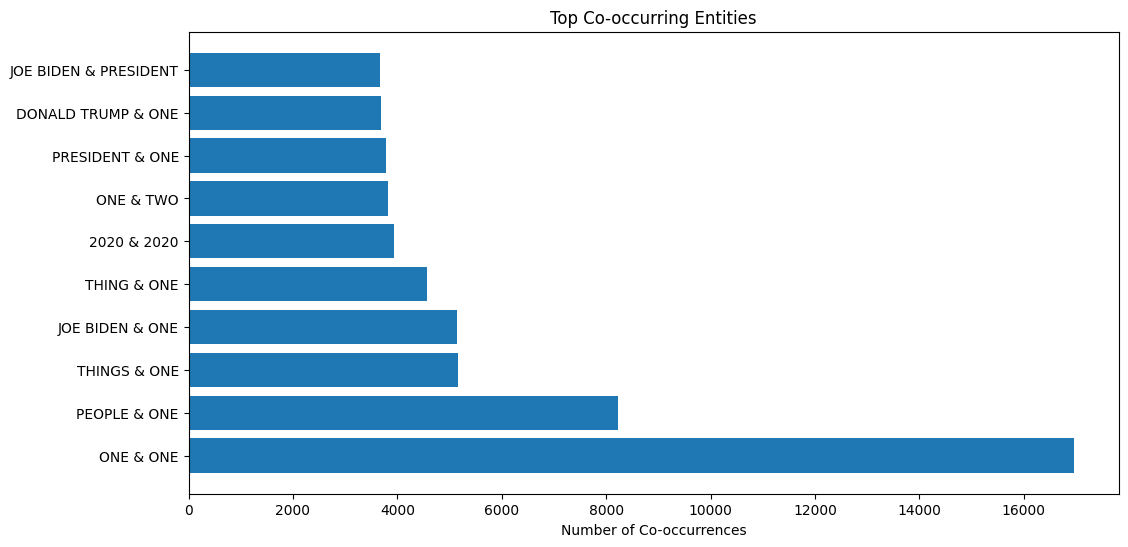

In [16]:
from itertools import combinations
from collections import Counter

# Create co-occurrence matrix
co_occurrences = Counter()
for entity_list in df['entities']:
    if len(entity_list) > 1:
        pairs = combinations([e['name'] for e in entity_list], 2)
        co_occurrences.update(pairs)

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrences.items(), columns=['pair', 'count'])

# Filter for top co-occurrences
top_co_occurrences = co_occurrence_df.nlargest(10, 'count')

# Plot co-occurrences
plt.figure(figsize=(12, 6))
plt.barh([f'{p[0]} & {p[1]}' for p in top_co_occurrences['pair']],
         top_co_occurrences['count'])
plt.xlabel('Number of Co-occurrences')
plt.title('Top Co-occurring Entities')
plt.show()